# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 3 (Thu)**



### Student Information 

_Full Name (Last Name, First Name)_: Vertudez, Genesis \
_Student No._: 202003099 \
_Section_: HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov. 10, 2022

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** GENESIS R. VERTUDEZ

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

# Set the constants and/or variables

N = np.array([10,100,1000])    # number of slices stored in an array
a = 0                          # lower limit of integral
b = 5                          # upper limit of integral
h = (b-a)/N                    # width of each slice

In [3]:
# 1.

I_trap = np.zeros(len(N))      # initialize an array, we will store the calculated integrals for trapezoidal rule here

print('1.) The integral using trapezoidal rule for each number of slices:\n')

# Trapezoidal rule

for i in range(len(N)):        # loops each case of number of slices
    s = 0.5*f(a) + 0.5*f(b)    # initialize the sum
    
    for k in range(1,N[i]):    # Note that the summation is from 1 to N-1, but in python,
        s += f(a+k*h[i])          # the range is exclusive of the upper bound so we use range(1,N)
        I_trap[i] = h[i]*s     # store corresponding answers in the array we initialized
    
    print('\t{} slices: {}'.format(N[i], I_trap[i]))

1.) The integral using trapezoidal rule for each number of slices:

	10 slices: 1471.4375
	100 slices: 1450.2145812500003
	1000 slices: 1450.0021458331234


In [4]:
# Manual integration

# Define the indefinite integral
def int_f(x):
    return (2*x**5)/5 + x**3 + 2*x**2 + 5*x

# Solve the definite integral
I_manual = int_f(b) - int_f(a)

print('Solving the integral manually, the answer is {}.\n'.format(I_manual))

Solving the integral manually, the answer is 1450.0.



In [5]:
# 2.

# Define a percent error calculator, I just attached a % symbol
def percentError(exp, theo):
    percent = abs((exp-theo)/theo)*100
    return percent

E_trap = np.zeros(len(N))       # initialize an array, we will store here the percent errors for trapezoidal rule

print('2.) The percent error using trapezoidal rule for each number of slices is:')
for i in range(len(N)):         # loops each case of number of slices
    E_trap[i] = percentError(I_trap[i], I_manual)
    print('\t {} slices: {} %'.format(N[i], E_trap[i]))

2.) The percent error using trapezoidal rule for each number of slices is:
	 10 slices: 1.478448275862069 %
	 100 slices: 0.014798706896569988 %
	 1000 slices: 0.00014798849127240326 %


In [6]:
# 3.

# Simpson's rule

I_simp = np.zeros(len(N))       # initialize an array, we will store the calculated integrals for Simpson's rule here

print('3.) The integral using Simpson\'s rule for each number of slices:\n')

for i in range(len(N)):        # loops each case of number of slices
    s = f(a) + f(b)
    for k in range(1,N[i]):   
        if k % 2 == 1:         # for odd sum indices
            s += 4*f(a+k*h[i])
        else:                  # for even sum indices
            s += 2*f(a+k*h[i])
        I_simp[i] = (h[i]/3)*s     # store corresponding answers in the array we initialized
    print('\t{} slices: {}'.format(N[i], I_simp[i]))

3.) The integral using Simpson's rule for each number of slices:

	10 slices: 1450.0833333333333
	100 slices: 1450.0000083333334
	1000 slices: 1450.0000000008333


In [7]:
# 4.

E_simp = np.zeros(len(N))       # initialize an array, we will store here the percent errors for trapezoidal rule

print('4.) The percent error using Simpson\'s rule for each number of slices is:\n')
for i in range(len(N)):         # loops each case of number of slices
    E_simp[i] = percentError(I_simp[i], I_manual)
    print('\t {} slices: {} %'.format(N[i], E_simp[i]))
    
print('\nComparing, here are the percent errors using trapezoidal rule and Simpson\'s rule (Trapezoidal rule / Simpson\'s rule):\n')
for i in range(len(N)):
    print('{} slices: {} / {}'.format(N[i], E_trap[i], E_simp[i]))
    
print('\nWe see that the Simpson\'s rule gives smaller percent error, i.e., more accurate answers.')

4.) The percent error using Simpson's rule for each number of slices is:

	 10 slices: 0.005747126436776382 %
	 100 slices: 5.747126500676226e-07 %
	 1000 slices: 5.7470656586168655e-11 %

Comparing, here are the percent errors using trapezoidal rule and Simpson's rule (Trapezoidal rule / Simpson's rule):

10 slices: 1.478448275862069 / 0.005747126436776382
100 slices: 0.014798706896569988 / 5.747126500676226e-07
1000 slices: 0.00014798849127240326 / 5.7470656586168655e-11

We see that the Simpson's rule gives smaller percent error, i.e., more accurate answers.


### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [8]:
# 1.

# Define the function, i used the sine function from numpy
def g(x):
    return (np.sin((100*x)**(0.5)))**2

N = 1
a = 0
b = 1
h = (b-a)/N
epsilon = 10e-6     # target error

# initialize lists to be put in dataframe (to be used for plotting later, and for more organized display of answers)
N_list = []            # no. of slices
I_est_list = []        # integral estimates for each no. of slice
error_adap_trap_list = []        # error estimate for each integral estimate

In [9]:
# Normal trapezoidal rule
N_list.append(N)                       # append N=1 to N_list
s = 0.5*g(a) + 0.5*g(b)                # initialize the sum

for k in range(1,N):                   # Note that the summation is from 1 to N-1, but in python,
    s += g(a+k*h)                           # the range is exclusive of the upper bound so we use range(1,N)

I_adap_trap_1 = h*s                    # store corresponding answers
I_est_list.append(I_adap_trap_1)       # append integral estimate for N=1
error_trap = abs(I_adap_trap_1)        # I equated it because this will be the basis for the error
error_adap_trap_list.append(error_trap)          # append error estimate for N=1

In [11]:
# Adaptive trapezoidal rule

adap_trap_df = pd.DataFrame()          # initialize a dataframe for the answers

while abs(error_trap) > epsilon:          # loop until calculated error is less than target error, meaning we reached our desired accuracy
    I_adap_trap_2 = 0.5*I_adap_trap_1     # initialize the integral estimation
    N*=2                                  # double number of slices
    N_list.append(N)                      # append each doubled N to the list
    h*=0.5                                # half the h
    
    for k in range(1,N,2):                # summation over odd indices
        I_adap_trap_2 += h*g(a+k*h)
    
    I_est_list.append(I_adap_trap_2)      # append each integral estimate to the list
    error_trap = (1/3)*abs(I_adap_trap_2 - I_adap_trap_1)     # formula for error
    error_adap_trap_list.append(error_trap)         # append each error estimate to the list
    I_adap_trap_1 = I_adap_trap_2         # recurse

# assign each list to a new column in the dataframe
adap_trap_df['No. of slices'] = N_list
adap_trap_df['Integral estimate'] = I_est_list
adap_trap_df['Error'] = error_adap_trap_list
adap_trap_df['Target error (constant)'] = epsilon
print('Adaptive trapezoidal')
adap_trap_df

Adaptive trapezoidal


,No. of slices,Integral estimate,Error,Target error (constant)
0,1,0.147979,0.147979,0.00001
1,2,0.325232,0.059084,0.00001
2,4,0.512283,0.062350,0.00001
3,8,0.402997,0.036428,0.00001
4,16,0.430103,0.009035,0.00001
5,32,0.448415,0.006104,0.00001
6,64,0.453913,0.001833,0.00001
7,128,0.455349,0.000479,0.00001
8,256,0.455711,0.000121,0.00001
9,512,0.455802,0.000030,0.00001


In [13]:
# Romberg integration

romberg_df = pd.DataFrame()

romberg_list = []
romberg_last_list = []

error_rom = (1/(4**1 - 1))*(adap_trap_df['Integral estimate'][1] - adap_trap_df['Integral estimate'][0])

error_rom_list = []

i = 0
m = 0
while abs(error_rom) > epsilon:
    if m == 0:
        R_im = adap_trap_df['Integral estimate'][i]
        romberg_list.append([R_im])
    else:
        R_im = romberg_list[i][m-1] + (1/(4**(m)))*(romberg_list[i][m-1] - romberg_list[i-1][m-1])
        romberg_list[i].append(R_im)
        
    if i != m:
        error_rom = abs((1/(4**(m+1) - 1))*(romberg_list[i][m] - romberg_list[i-1][m]))
        m += 1
    else:
        i += 1
        m = 0
        error_rom_list.append(error_rom)
        romberg_last_list.append(R_im)
    
error_rom_list.append(error_rom)
romberg_last_list.append(R_im)

N_rom_list = N_list[:len(error_rom_list)]
romberg_df['No. of slices'] = N_rom_list
romberg_df['Integral estimate'] = romberg_last_list
romberg_df['Error'] = error_rom_list
print('Romberg integration')
romberg_df

Romberg integration


,No. of slices,Integral estimate,Error
0,1,0.147979,0.059084
1,2,0.369545,0.059084
2,4,0.570889,0.012633
3,8,0.360986,0.003281
4,16,0.442216,0.000317
5,32,0.454267,0.000012
6,64,0.455453,0.000005


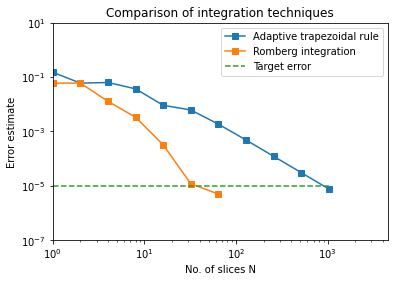

In [18]:
fig, ax = plt.subplots()

ax.plot(adap_trap_df['No. of slices'], adap_trap_df['Error'], label='Adaptive trapezoidal rule', marker='s')
ax.plot(romberg_df['No. of slices'], romberg_df['Error'], label='Romberg integration', marker='s')
ax.plot(adap_trap_df['No. of slices'], adap_trap_df['Target error (constant)'], label='Target error', linestyle='--')



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('No. of slices N')
ax.set_ylabel('Error estimate')

plt.xlim(1,4500)
plt.ylim(10e-8,10)
plt.title('Comparison of integration techniques')
plt.legend()
plt.show()

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*